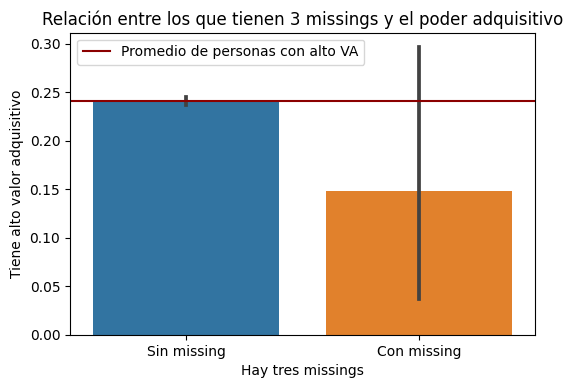

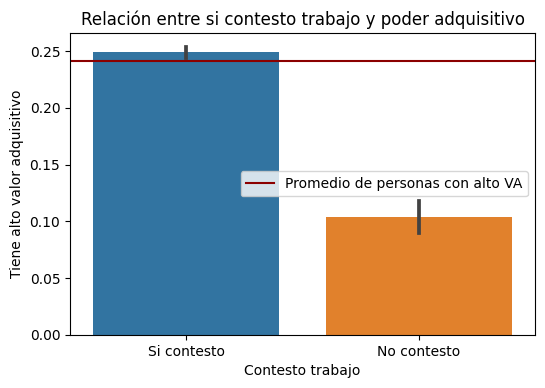

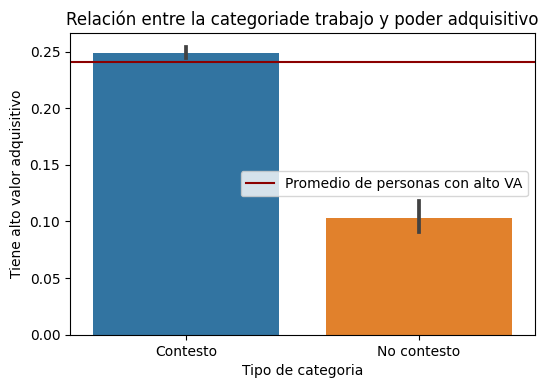

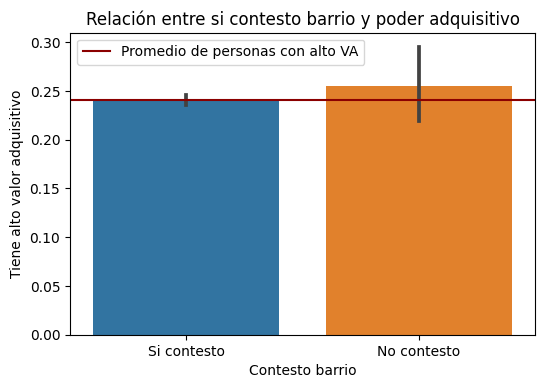

In [1]:
%run "../Secciones/feature_engineering.ipynb"

### anios_estudiados

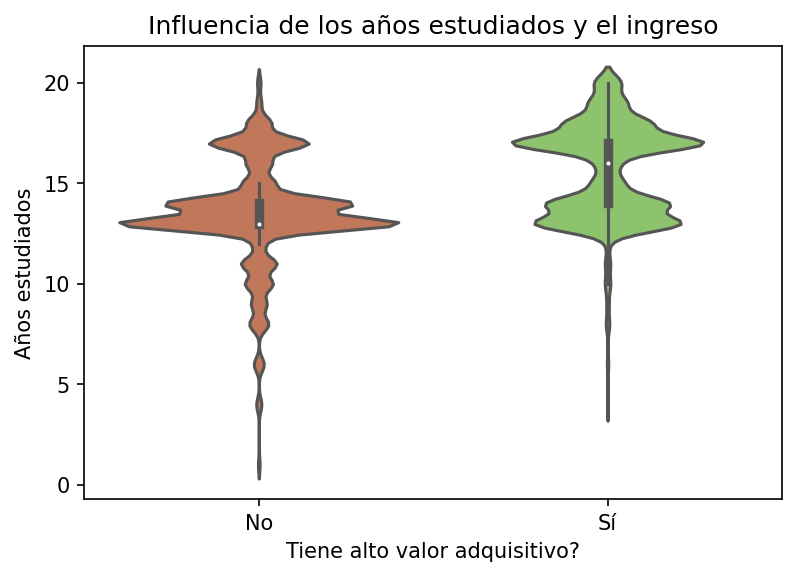

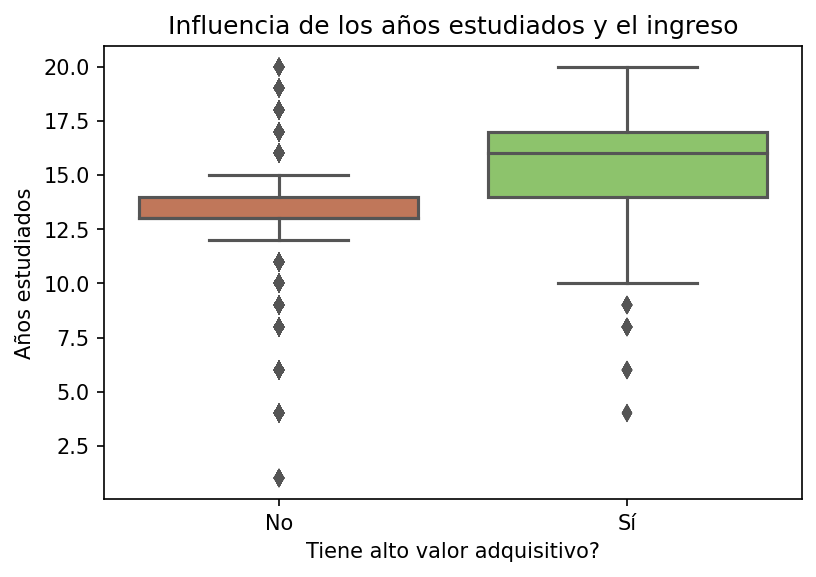

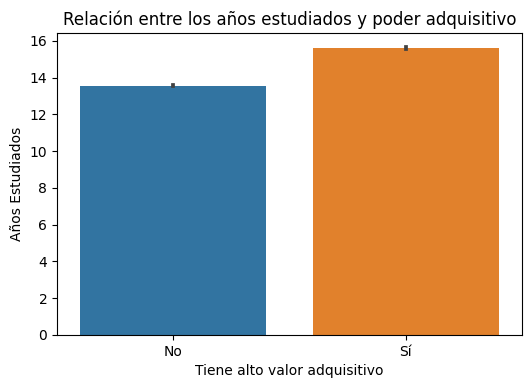

In [2]:
#VIOLINPLOT
plt.figure(dpi=150)
plt.title("Influencia de los años estudiados y el ingreso")
sns.violinplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Años estudiados")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BOXPLOT
plt.figure(dpi=150)
plt.title("Influencia de los años estudiados y el ingreso")
sns.boxplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
ax.tick_params(which='both', width=2)
plt.ylabel("Años estudiados")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BARPLOT
plt.figure(dpi=100)
ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='anios_estudiados')

plt.ylabel("Años Estudiados")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks([False, True], ["No", "Sí"])
plt.title('Relación entre los años estudiados y poder adquisitivo')
plt.show()

Notas:
    
+ ViolinPlot muesta cierta tendencia en dos valores, 13 (terminar la secundaria) y 16/17 (terminanado una carrea). La distribucion es marcada cuando no tiene poder adquisitivo. Pero para los que si, parece estar distribuidos  mas uniformemente.(+)

+ Boxplot nos muetra la marcada diferencia entre las medianas de ambos grupos.(-)

+ Barplot remarca lo mismo que Boxplot(+)


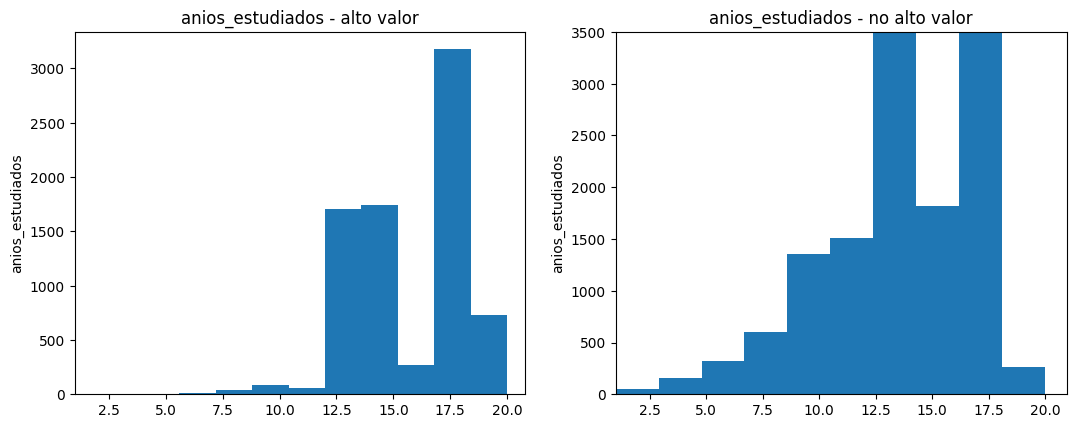

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df[df.tiene_alto_valor_adquisitivo == 1]
df_no_alto_valor = df[df.tiene_alto_valor_adquisitivo != 1]

df_alto_valor.anios_estudiados.plot(kind='hist', ax=axes[0], xlim=df.anios_estudiados.min())
axes[0].set_title("anios_estudiados - alto valor")
axes[0].set_ylabel("anios_estudiados")

df_no_alto_valor.anios_estudiados.plot(kind='hist', ax=axes[1], xlim=df.anios_estudiados.min(), ylim=[0,3500])
axes[1].set_title("anios_estudiados - no alto valor")
axes[1].set_ylabel("anios_estudiados")

plt.show()

In [4]:
df_alto_valor[df_alto_valor['anios_estudiados'] >= 17].value_counts().sum()/df_alto_valor.value_counts().sum() * 100

49.85326017608779

In [5]:
df[df['anios_estudiados'] >= 17].value_counts().sum()/df.value_counts().sum() * 100

24.773265287299782

In [6]:
df['tiene_alto_valor_adquisitivo'].value_counts().sum()

32527

+ Si anios_estudiados < 12,5: no tenes alto valor adquisitivo 94,6% del grupo, 13,4% del total

### Estado marital y anios estudiados

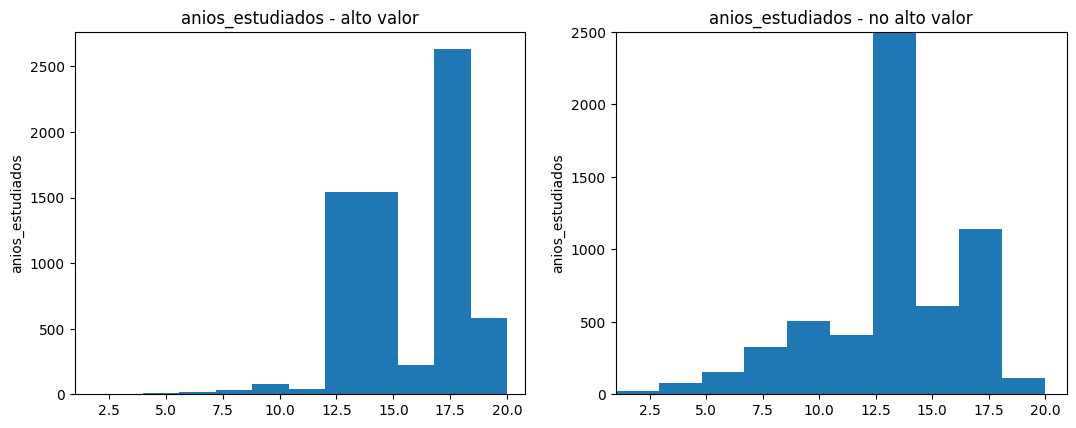

In [7]:
df_matrimonio = df[df['estado_marital'] == 'matrimonio']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_mat_alto_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] == 1]
df_mat_bajo_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] != 1]

df_mat_alto_valor.anios_estudiados.plot(kind='hist', ax=axes[0], xlim=df.anios_estudiados.min())
axes[0].set_title("anios_estudiados - alto valor")
axes[0].set_ylabel("anios_estudiados")

df_mat_bajo_valor.anios_estudiados.plot(kind='hist', ax=axes[1], xlim=df.anios_estudiados.min(), ylim=[0,2500])
axes[1].set_title("anios_estudiados - no alto valor")
axes[1].set_ylabel("anios_estudiados")

plt.show()

In [8]:
df[df['estado_marital'] == 'matrimonio'].value_counts().sum()

14988

In [9]:
df_mat_alto_valor[df_mat_alto_valor['anios_estudiados'] >= 17.5].value_counts().sum()/df_mat_alto_valor.value_counts().sum() * 100

20.289638698118843

In [10]:
df_matrimonio[df_matrimonio['anios_estudiados'] >= 17.5].value_counts().sum()/df_matrimonio.value_counts().sum() * 100

11.335735254870563

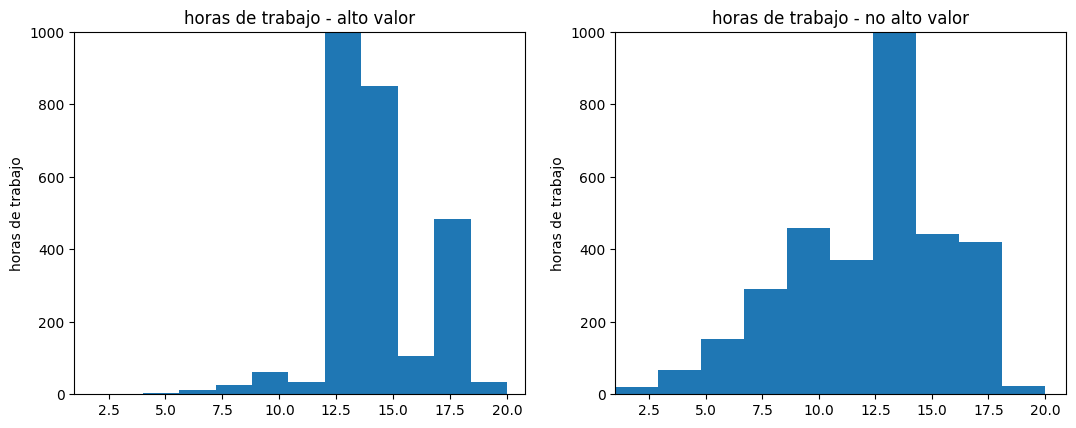

In [25]:
condicion = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt = df[(df['estado_marital'] == 'matrimonio') & (condicion)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_alto_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_bajo_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_alto_valor.anios_estudiados.plot(kind='hist', ax=axes[0], xlim=df_sm_nt.anios_estudiados.min(), ylim=[0,1000])
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_bajo_valor.anios_estudiados.plot(kind='hist', ax=axes[1], xlim=df_sm_nt.anios_estudiados.min(), ylim=[0,1000])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

In [34]:
df_sm_nt_alto_valor[df_sm_nt_alto_valor['anios_estudiados'] < 14.5].value_counts().sum()/df_alto_valor.value_counts().sum() * 100

23.771851473778234

In [30]:
condicion =(df_sm_nt_bajo_valor['anios_estudiados'] > 12) & (df_sm_nt_bajo_valor['anios_estudiados'] < 16)  
df_sm_nt_bajo_valor[condicion].value_counts().sum()/df_no_alto_valor.value_counts().sum() * 100

16.650465775617658

In [14]:
df_alto_valor.value_counts().sum()

7837

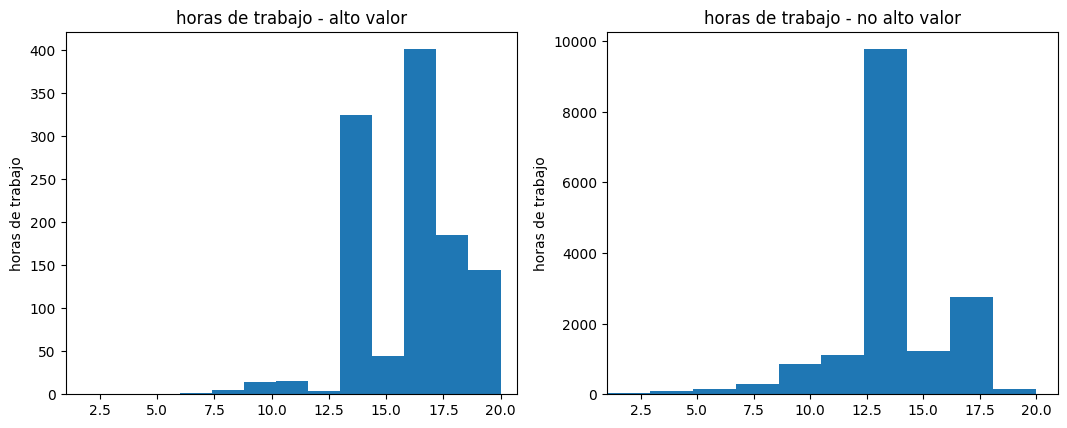

In [15]:
df_nm = df[(df['estado_marital'] != 'matrimonio')]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_nm_alto_valor = df_nm[df_nm['tiene_alto_valor_adquisitivo'] == 1]
df_nm_bajo_valor = df_nm[df_nm['tiene_alto_valor_adquisitivo'] != 1]

df_nm_alto_valor.anios_estudiados.plot(kind='hist', ax=axes[0], xlim=df_nm.anios_estudiados.min())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_nm_bajo_valor.anios_estudiados.plot(kind='hist', ax=axes[1], xlim=df_nm.anios_estudiados.min())
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()